In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('data-final.csv', delimiter="\t", na_values = ['null']) #horizontal tab for each \t
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [60]:
# list all columns available
columns = df.columns
for column in columns: 
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [61]:
# displays first 50 columns (questionaire questions)
X = df[df.columns[0:50]]
pd.set_option('display.max_columns', None) # used to expand the novisible columns of df
X


# data = df.copy()
# pd.options.display.max_columns = 150

# data.drop(data.columns[50:107], axis=1, inplace=True)
# data.drop(data.columns[51:], axis=1, inplace=True)

# print('Number of participants: ', len(data))
# data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [62]:
print("null values: ", X.shape)
print("null values present: ", X.isnull().values.any()) #True if there are nulls

null values:  (1015341, 50)
null values present:  True


In [63]:
# fill nulls with zeros
X = X.fillna(0) 

In [64]:
# no. of clusters is the number of personalities 
kmeans = MiniBatchKMeans(n_clusters=16, random_state=0, batch_size=2048, max_iter=100).fit(X)

In [65]:
# X = []
# k_means = range(1, 10)
# for k in k_means:
#     km = KMeans(n_clusters = k)
#     km.fit(df[[]])

In [66]:
len(kmeans.cluster_centers_)

16

In [67]:
one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three =kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five =kmeans.cluster_centers_[4]
six = kmeans.cluster_centers_[5]
seven = kmeans.cluster_centers_[6]
eight = kmeans.cluster_centers_[7]
nine= kmeans.cluster_centers_[8]
ten = kmeans.cluster_centers_[9]
eleven = kmeans.cluster_centers_[10]
twelve = kmeans.cluster_centers_[11]
thirteen = kmeans.cluster_centers_[12]
fourteen = kmeans.cluster_centers_[13]
fifteen = kmeans.cluster_centers_[14]
sixteen = kmeans.cluster_centers_[15]

In [68]:
one

array([2.56680563, 2.86911232, 3.44786353, 3.26210983, 3.2565193 ,
       2.24316414, 2.66415013, 3.47924456, 3.12761459, 3.70895799,
       2.20075735, 4.07597386, 3.1404083 , 3.06711025, 2.23312986,
       1.83844803, 2.26093916, 1.80103449, 2.13006343, 2.22316725,
       1.98696738, 4.07174513, 2.17957784, 4.0816719 , 2.11823731,
       3.69733494, 2.00132596, 3.76444519, 3.83067146, 3.73559662,
       2.75036135, 3.96986131, 3.69040651, 2.94608962, 1.79746276,
       3.79970853, 3.02880078, 2.75872326, 2.32701014, 3.34261106,
       4.07542437, 1.5528532 , 4.28954882, 1.54332063, 4.04933523,
       1.58282465, 4.26957581, 3.57360267, 4.33616045, 4.29325194])

In [98]:
one_scores = {}
# E/I
one_scores['Extroversion_score'] = one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
# one_scores['Introversion_scrore'] = - one[0] - one[1] - one[2] + one[3] - one[4] + one[5] - one[6] + one[7] - one[8] + one[9] 
# I/S
one_scores['Intuition_score'] = one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]
# one_scores['Sensing'] = -one[0] + one[1] - one[2] + one[3] - one[4] + one[5] - one[6] - one[7] - one[8] - one[9]
# F/T
one_scores['Feeling_score'] = -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
# one_scores['Thinking'] = one[0] - one[1] + one[2] - one[3] + one[4] + one[5] - one[6] + one[7] - one[8] - one[9]
# J/P
one_scores['Judging_score'] = one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
# one_scores['Perceiving'] = -one[0] + one[1] - one[2] + one[3] - one[4] + one[5] - one[6] + one[7] - one[8] - one[9]

# T/A
one_scores['Turbulent_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
# one_scores['Assertive'] = -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] - one[6] - one[7] - one[8] - one[9]

In [99]:
one_scores

{'Extroversion_score': -0.49963565993333603,
 'Intuition_score': 13.876769438438481,
 'Feeling_score': 0.6383476879337775,
 'Judging_score': 6.91828031488539,
 'Turbulent_score': 18.363097726756898}

In [100]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten, 'eleven': eleven, 'twelve': twelve, 'thirteen': thirteen, 'fourteen': fourteen, 'fifteen': fifteen, 'sixteen': sixteen,}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['Extroversion_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['Intuition_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['Feeling_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['Judging_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['Turbulent_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]

    all_types_scores[name] = personality_trait


In [101]:
all_types_scores

{'one': {'Extroversion_score': -0.49963565993333603,
  'Intuition_score': 13.876769438438481,
  'Feeling_score': 0.6383476879337775,
  'Judging_score': 6.91828031488539,
  'Turbulent_score': 18.363097726756898},
 'two': {'Extroversion_score': -4.595628192032687,
  'Intuition_score': 11.40320054477358,
  'Feeling_score': 0.5701600272386851,
  'Judging_score': 3.791324480762685,
  'Turbulent_score': 17.7754988083078},
 'three': {'Extroversion_score': -3.718519029505096,
  'Intuition_score': 12.046228590574925,
  'Feeling_score': 0.3690699095334824,
  'Judging_score': 4.166121370991583,
  'Turbulent_score': 17.145958570668345},
 'four': {'Extroversion_score': 5.987333993804936,
  'Intuition_score': 18.21504621211171,
  'Feeling_score': -2.682735355714125,
  'Judging_score': 11.632560414341423,
  'Turbulent_score': 22.047428549930398},
 'five': {'Extroversion_score': -5.564964190117921,
  'Intuition_score': 10.079034941763727,
  'Feeling_score': 2.587752296896484,
  'Judging_score': 2.7475

In [102]:
# ************************

In [103]:
# to compare types I normalized the data
all_extroversion = []
all_intuition =[]
all_feeling =[]
all_judging =[]
all_turbulent =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['Extroversion_score'])
    all_intuition.append(personality_trait['Intuition_score'])
    all_feeling.append(personality_trait['Feeling_score'])
    all_judging.append(personality_trait['Judging_score'])
    all_turbulent.append(personality_trait['Turbulent_score'])
    
    
    

In [104]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_intuition_normalized = (all_intuition-min(all_intuition))/(max(all_intuition)-min(all_intuition))
all_feeling_normalized = (all_feeling-min(all_feeling))/(max(all_feeling)-min(all_feeling))
all_judging_normalized = (all_judging-min(all_judging))/(max(all_judging)-min(all_judging))

all_turbulent_normalized = (all_turbulent-min(all_turbulent))/(max(all_turbulent)-min(all_turbulent))



# all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
# all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
# all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
# all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
# all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [105]:
all_extroversion_normalized

array([0.4886295 , 0.31956528, 0.35576842, 0.75638256, 0.27955543,
       0.52532541, 0.98782171, 0.        , 1.        , 0.35539309,
       0.77087998, 0.02804991, 0.56622005, 0.07592462, 0.39633114,
       0.68148161])

In [106]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['Extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['Intuition_score'] = all_intuition_normalized[counter]
    normalized_personality_trait['Feeling_score'] = all_feeling_normalized[counter]
    normalized_personality_trait['Judging_score'] = all_judging_normalized[counter]
    normalized_personality_trait['Turbulent_score'] = all_turbulent_normalized[counter]

    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [107]:
normalized_all_types_scores

{'one': {'Extroversion_score': 0.48862950414711204,
  'Intuition_score': 0.6471630457561506,
  'Feeling_score': 0.5884074209681635,
  'Judging_score': 0.517092317194059,
  'Turbulent_score': 0.7573031406255833},
 'two': {'Extroversion_score': 0.3195652781355495,
  'Intuition_score': 0.523530196882893,
  'Feeling_score': 0.5766066049139328,
  'Judging_score': 0.35760987935412214,
  'Turbulent_score': 0.7313512659688348},
 'three': {'Extroversion_score': 0.3557684158435116,
  'Intuition_score': 0.5556697461032245,
  'Feeling_score': 0.5418051838771574,
  'Judging_score': 0.37672544251502676,
  'Turbulent_score': 0.7035470123774219},
 'four': {'Extroversion_score': 0.7563825566917775,
  'Intuition_score': 0.8639969160815614,
  'Feeling_score': 0.013648150751196398,
  'Judging_score': 0.7575321963625108,
  'Turbulent_score': 0.9200251755288458},
 'five': {'Extroversion_score': 0.2795554297344269,
  'Intuition_score': 0.4573463253524238,
  'Feeling_score': 0.9257788012316029,
  'Judging_sco

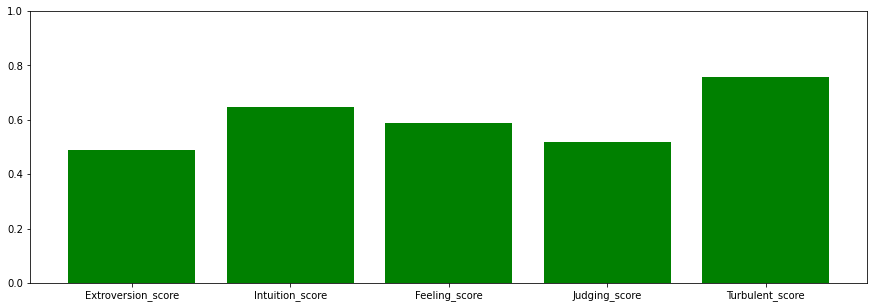

In [108]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
plt.show()

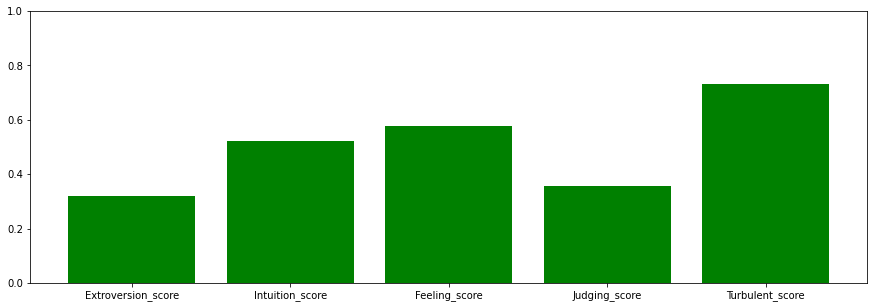

In [109]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='g')
plt.show()

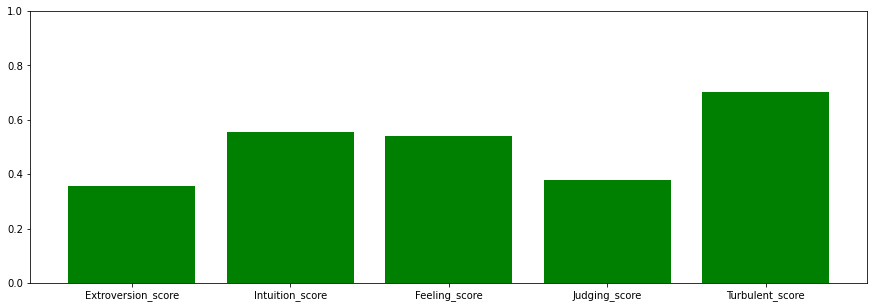

In [110]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='g')
plt.show()

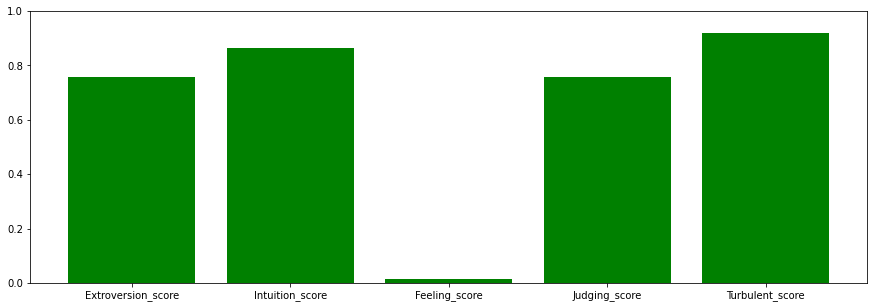

In [111]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='g')
plt.show()

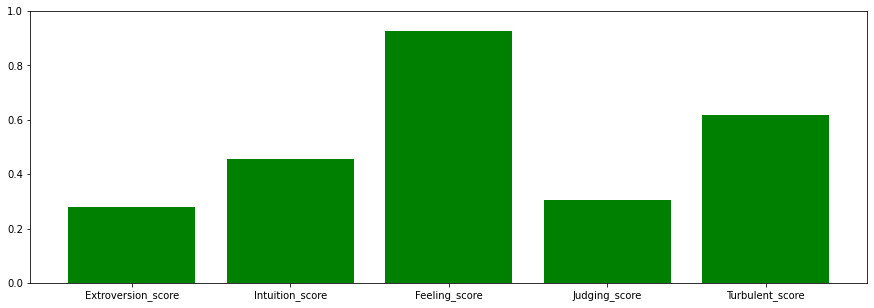

In [112]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='g')
plt.show()

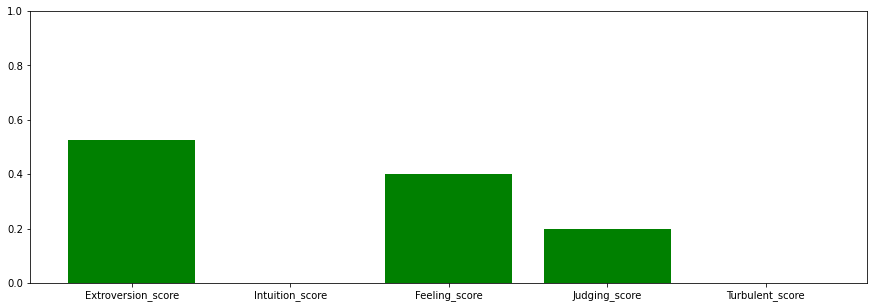

In [113]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='g')
plt.show()

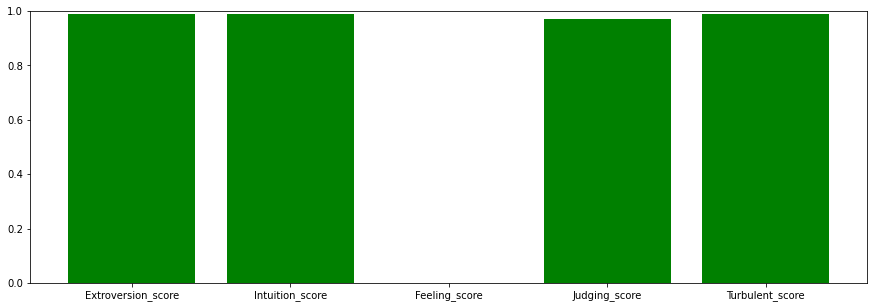

In [114]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='g')
plt.show()

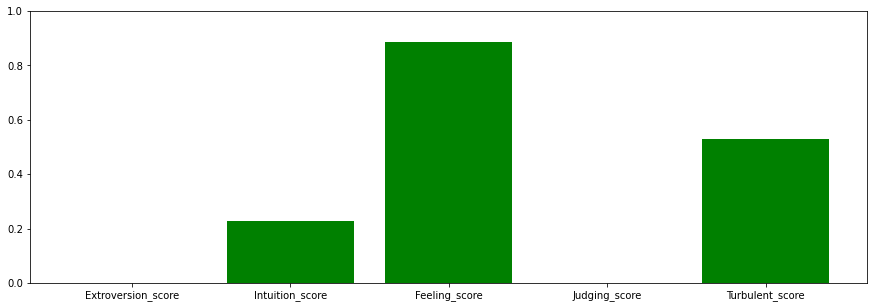

In [115]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='g')
plt.show()

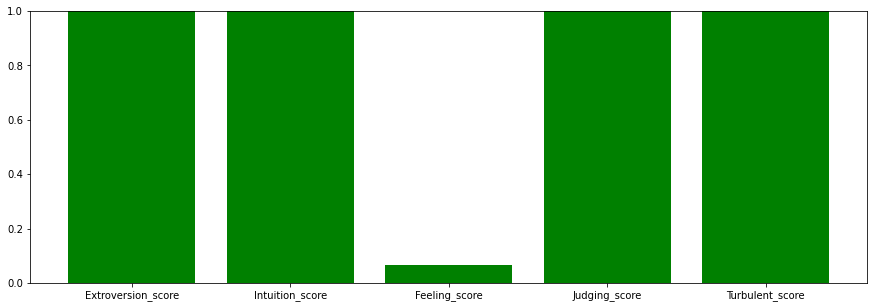

In [116]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='g')
plt.show()

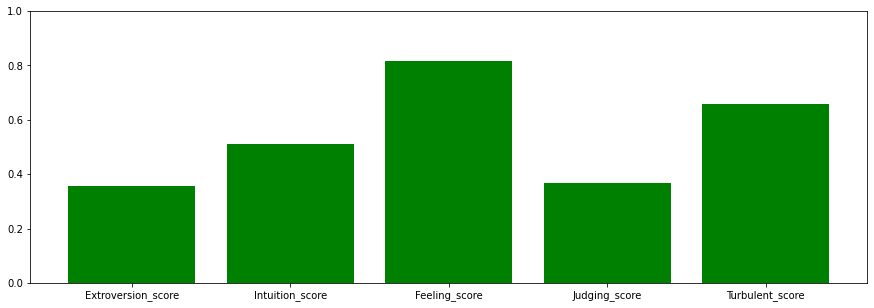

In [117]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='g')
plt.show()

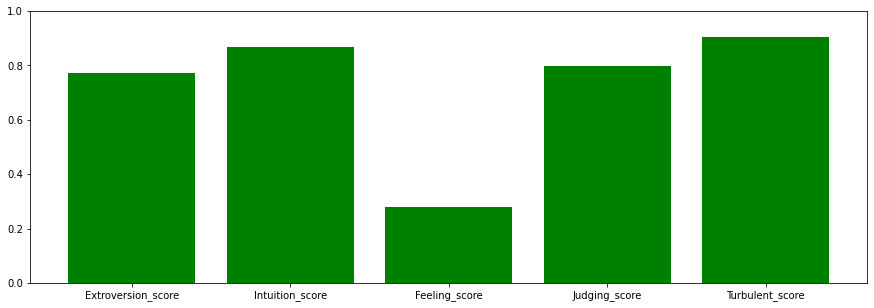

In [118]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eleven'].keys()), normalized_all_types_scores['eleven'].values(), color='g')
plt.show()

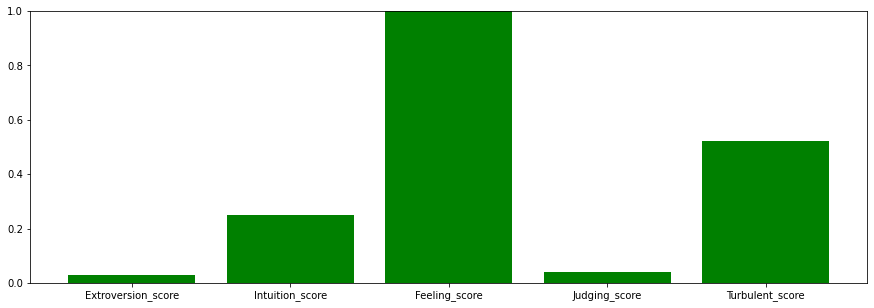

In [119]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['twelve'].keys()), normalized_all_types_scores['twelve'].values(), color='g')
plt.show()

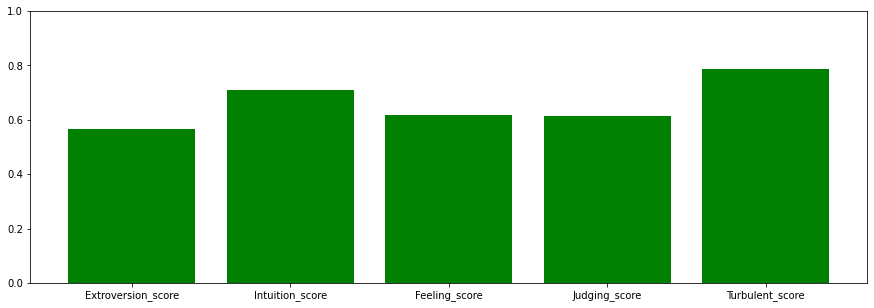

In [120]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['thirteen'].keys()), normalized_all_types_scores['thirteen'].values(), color='g')
plt.show()

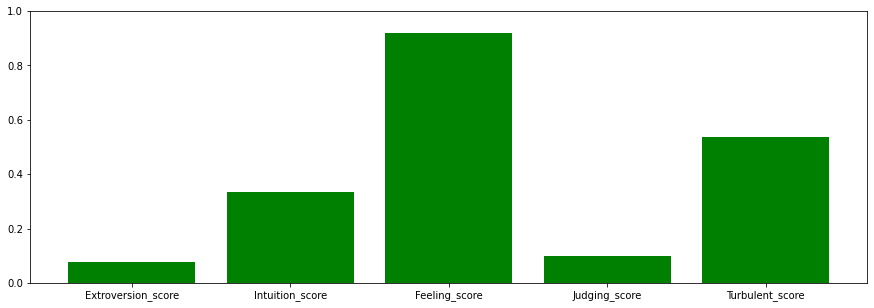

In [121]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['fourteen'].keys()), normalized_all_types_scores['fourteen'].values(), color='g')
plt.show()

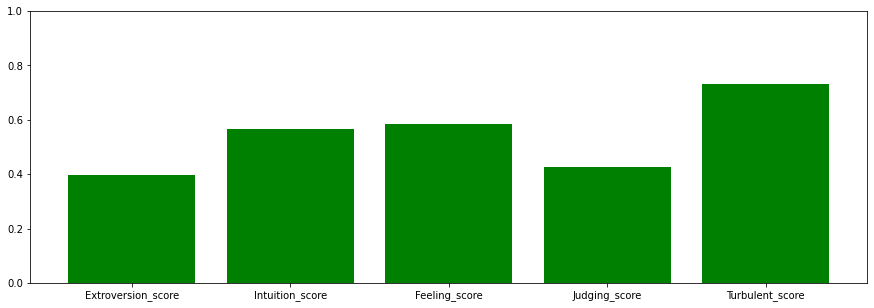

In [122]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['fifteen'].keys()), normalized_all_types_scores['fifteen'].values(), color='g')
plt.show()

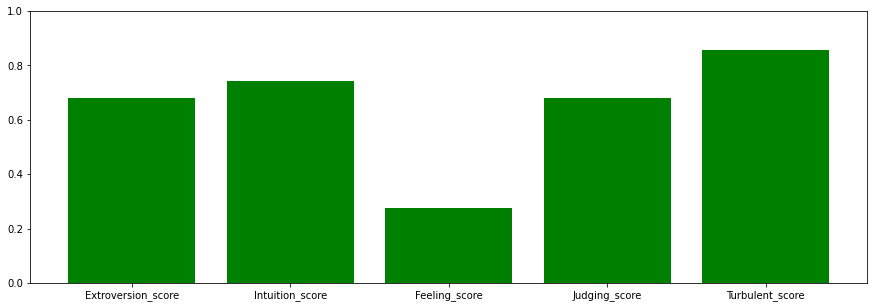

In [123]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['sixteen'].keys()), normalized_all_types_scores['sixteen'].values(), color='g')
plt.show()

In [124]:
# X.drop(X.index[1:], 0, inplace = True)
# X
# save data frame as csv file
# X.to_csv('test_data.csv')

In [125]:
# testing data
my_data = pd.read_csv('test_data.csv')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,3,4,2,5,5,3,2,5,1,2,3,4,4,2,3,1,4,5,3,2,1,2,4,3,2,1,2,4,3,4,1,1,2,1,1,4,5,1,5,5,1,3,4,3,1,5,5,1,1,1


In [97]:
my_personality = kmeans.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [7]
